In [83]:
# -*- coding:utf-8
import numpy as np
import pyaudio #录制和播放
import wave # 导入wave库，处理音频
import time
import matplotlib.pyplot as plt
from scipy.io import wavfile #读取wav提取数据
from pydub import AudioSegment #　音频处理
plt.rcParams['font.family'] = 'simhei'
import warnings
warnings.filterwarnings('ignore')

In [84]:
def play_audio(rate,file_name): # rate 采用率 file_name保存文件名
    Chunk = 1024 # 读取的音频帧的大小
    Format = pyaudio.paInt16 #　音频格式为16位的整数
    Channels = 2 # 通道为2
    Rate = rate #采用率
    Record_times = 5 # 录制时间
    Nframes = int(Rate / Chunk * Record_times) # 计算出所需采集帧的数量
    File_name = file_name
    
    # 实例化一个对象
    p = pyaudio.PyAudio()
    
    # 使用该对象打开声卡，进入参数配置
    stream = p.open(format = Format,
                    channels = Channels,
                    rate = Rate,
                    input = True,
                    frames_per_buffer = Chunk)
    print("开始录音，整个过程持续五秒钟!!!")
    frames = []
    for i in range(0,Nframes):
        data = stream.read(Chunk)
        frames.append(data)
    print("完成录音!!!")
    
    # 关闭
    stream.stop_stream()
    stream.close()
    p.terminate()
    
    # 存储wav
    wf = wave.open(File_name,'wb') # 写入wav文件
    wf.setnchannels(Channels)# 设置通道数
    wf.setsampwidth(p.get_sample_size(Format)) # 设置样本宽度
    wf.setframerate(Rate)# 设置采样率
    wf.writeframes(b''.join(frames)) # 将列表的数据会合写入文件
    wf.close()
    print(f"语音保存为{File_name}")
    

In [85]:
play_audio(16000,"C2_1_y_1.wav")

开始录音，整个过程持续五秒钟!!!
完成录音!!!
语音保存为C2_1_y_1.wav


In [86]:
def read_audio(N,file_name): # N 采样率倍数，file_name文件名
    # 实例化一个对象
    p = pyaudio.PyAudio()
    
    wf = wave.open(file_name,'rb') # 只读
    def callback(in_data,frame_count,time_info,status):
        # in_data 读取音频数据 frame_count: 指定每次处理多少个音频帧 
        # time_info:包含时间戳采样率等 status表示音频流是否正常运行
        data = wf.readframes(frame_count)
        return (data,pyaudio.paContinue) # 回调函数完毕后等待更多的音频数据
    
    stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                   channels = wf.getnchannels(),
                   rate = int(wf.getframerate()*N),
                   output=True,
                   stream_callback=callback)
    
    # 打开数据流
    stream.start_stream()
    
    # 等待数据流停止
    while stream.is_active():
        time.sleep(0.1)
    
    # 关闭数据流
    stream.stop_stream()
    stream.close()
    wf.close()
    p.terminate()
                 
    

In [87]:
read_audio(1,'C2_1_y_1.wav')

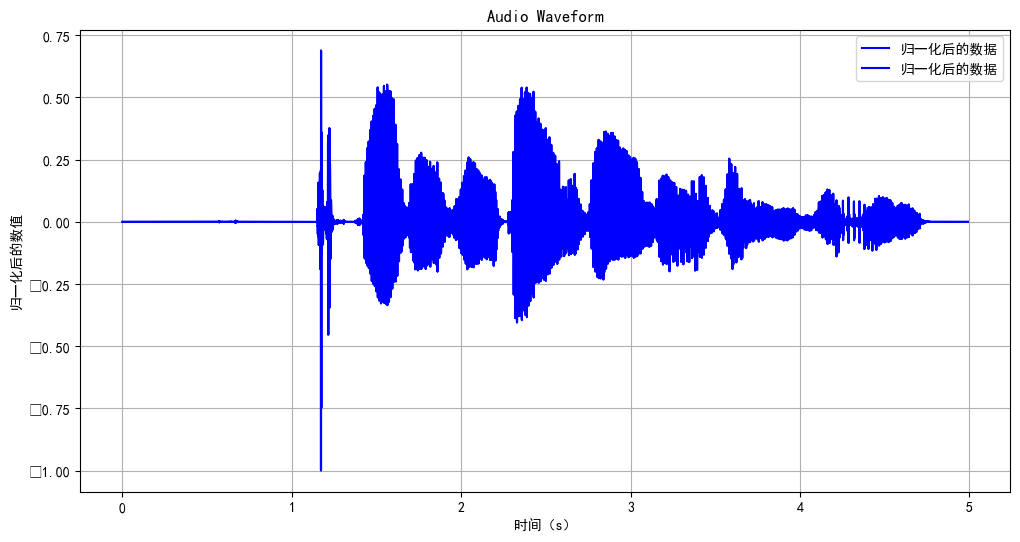

In [94]:
# 读取音频
sample_rate ,audio_data = wavfile.read('C2_1_y_1.wav')

# 归一化
max_abs = np.max(np.abs(audio_data))
audio_data = audio_data / max_abs


# 计算时间
time_axis = [i / sample_rate for i in range(len(audio_data))]

plt.figure(figsize=(12,6))
plt.plot(time_axis,audio_data,label="归一化后的数据",color='blue')
plt.xlabel("时间（s）")
plt.ylabel("归一化后的数值")
plt.title('Audio Waveform')
plt.grid(True)
plt.legend()
plt.show()

In [89]:
read_audio(2,'C2_1_y_1.wav')

In [90]:
read_audio(0.5,'C2_1_y_1.wav')

# 思考题

重采样的原理是根据所需的目标采样频率，
对音频数据进行插值或抽取来生成新的音频数据流。
这样可以加速或减慢音频的播放速度，同时保持音频的音质。

In [91]:
def save_radio(n,input_file,output_file):
    p = pyaudio.PyAudio() # 实例化一个对象
    # 打开需要播放的文件
    wf = wave.open(input_file, 'rb')
    # 创建新的音频文件并设置参数
    wf_out = wave.open(output_file, 'wb')
    wf_out.setnchannels(wf.getnchannels())
    wf_out.setsampwidth(wf.getsampwidth())
    wf_out.setframerate(int(wf.getframerate() * n))
    # 将读取的音频数据写入新文件
    wf_out.writeframes(wf.readframes(wf.getnframes()))
    # 关闭文件
    wf.close()
    wf_out.close()
    

In [92]:
save_radio(2,'C2_1_y_1.wav','2倍')
save_radio(0.5,'C2_1_y_1.wav','0.5倍')
read_audio(1,'2倍')
read_audio(1,'0.5倍')

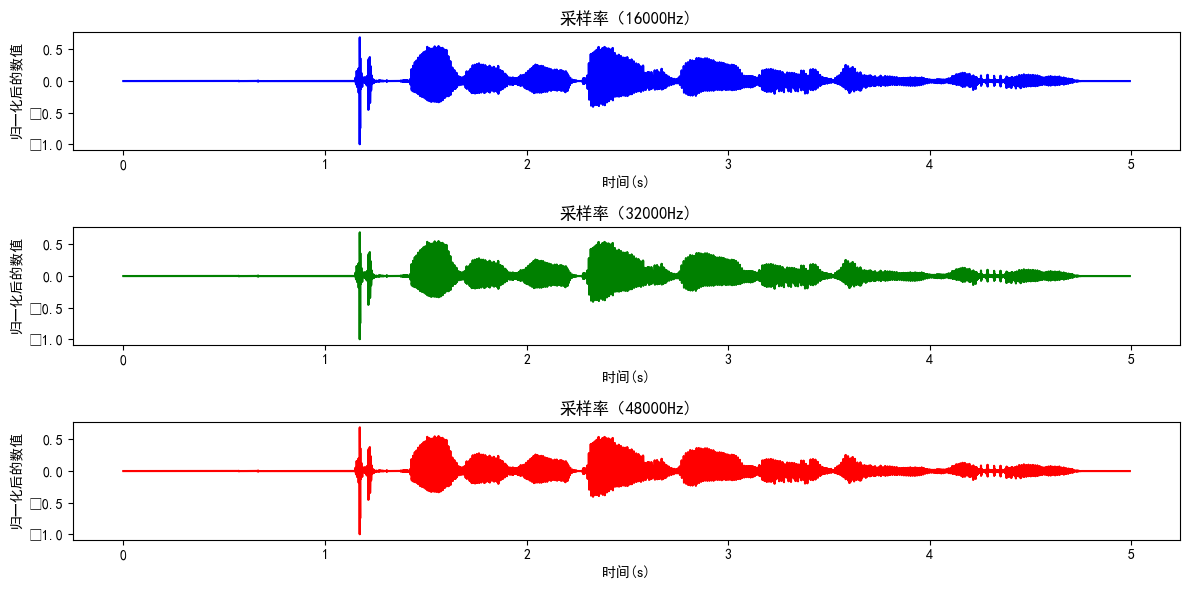

In [93]:
# 读取原始文件
fs,audio_data = wavfile.read('C2_1_y_1.wav')

# 生称时间轴
times = np.arange(len(audio_data)) / fs

# 归一化
max_abs = np.max(np.abs(audio_data))
audio_data = audio_data / max_abs

plt.figure(figsize=(12,6))

for i in range(1,4):
    colors = ['b','g','r']
    plt.subplot(3,1,i)
    plt.plot(times,audio_data,colors[i-1])
    plt.xlabel("时间(s)")
    plt.ylabel('归一化后的数值')
    plt.title("采样率（{}Hz)".format(fs*i))
plt.tight_layout()
plt.show()